In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# import sklearn
import pandas
pandas.__version__

'2.0.0'

In [3]:
dataset = pd.read_csv(r'C:\Users\kelvin\Downloads\dataset.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
ann = tf.keras.models.Sequential()

In [6]:
#try 'linear' this MAE 3.0
ann.add(tf.keras.layers.Dense(units=6, activation='linear'))

In [7]:
#mae 4.0
# ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [8]:
ann.add(tf.keras.layers.Dense(units=1))

In [9]:
#optional add metrics=['mae']
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae'])

In [10]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
240/240 [==============================] - 2s 3ms/step - loss: 106722.0469 - mae: 265.1691
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 303.6894 - mae: 14.2456
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 244.7756 - mae: 13.4008
Epoch 4/200
240/240 [==============================] - 1s 3ms/step - loss: 236.3651 - mae: 13.1451
Epoch 5/200
240/240 [==============================] - 1s 3ms/step - loss: 226.6181 - mae: 12.8299
Epoch 6/200
240/240 [==============================] - 1s 3ms/step - loss: 215.7233 - mae: 12.4992
Epoch 7/200
240/240 [==============================] - 1s 3ms/step - loss: 203.5695 - mae: 12.1158
Epoch 8/200
240/240 [==============================] - 1s 3ms/step - loss: 190.9075 - mae: 11.6713
Epoch 9/200
240/240 [==============================] - 1s 3ms/step - loss: 177.2684 - mae: 11.2078
Epoch 10/200
240/240 [==============================] - 1s 3ms/step - loss: 163.4293 - mae: 10.7106
Epoch

240/240 [==============================] - 1s 4ms/step - loss: 26.8848 - mae: 4.1264
Epoch 168/200
240/240 [==============================] - 1s 4ms/step - loss: 27.1744 - mae: 4.1408
Epoch 169/200
240/240 [==============================] - 1s 3ms/step - loss: 28.3265 - mae: 4.2354
Epoch 170/200
240/240 [==============================] - 1s 3ms/step - loss: 26.7389 - mae: 4.1175
Epoch 171/200
240/240 [==============================] - 1s 2ms/step - loss: 27.0182 - mae: 4.1422
Epoch 172/200
240/240 [==============================] - 1s 3ms/step - loss: 26.5875 - mae: 4.1051
Epoch 173/200
240/240 [==============================] - 1s 3ms/step - loss: 26.7561 - mae: 4.1258
Epoch 174/200
240/240 [==============================] - 1s 3ms/step - loss: 27.3042 - mae: 4.1474
Epoch 175/200
240/240 [==============================] - 1s 3ms/step - loss: 27.3829 - mae: 4.1553
Epoch 176/200
240/240 [==============================] - 1s 3ms/step - loss: 27.4559 - mae: 4.1780
Epoch 177/200
240/240 [=

In [11]:
test_loss,test_mae = ann.evaluate(X_test, y_test)
print('Test_loss',test_loss,'Test_mae',test_mae)

60/60 [==============================] - 1s 3ms/step - loss: 24.5677 - mae: 3.9405
Test_loss 24.567747116088867 Test_mae 3.9404661655426025


In [12]:
# ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

In [13]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 2ms/step
[[431.32 431.23]
 [462.32 460.01]
 [465.82 461.14]
 ...
 [473.04 473.26]
 [439.84 438.  ]
 [459.03 463.28]]


In [14]:
# test_loss, test_acc = ann.evaluate(x_test, y_test)
# print(f'Test accuracy: {test_acc}')

In [15]:
import matplotlib.pyplot as plt

y_pred = ann.predict(X_test)
pred=pd.DataFrame(y_pred,columns=['Predictions'])
actual=pd.DataFrame(y_test,columns=['Actual'])

60/60 [==============================] - 0s 2ms/step


In [16]:
ab=pd.concat([pred,actual],axis=1)
ab['Predictions'] - ab['Actual']

0       0.086315
1       2.308085
2       4.680862
3       3.045129
4       8.844888
          ...   
1909   -0.346732
1910    5.028242
1911   -0.221426
1912    1.840027
1913   -4.246492
Length: 1914, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('mean_squared_error:',mean_absolute_error(y_test,y_pred))

mean_squared_error: 24.567744743489175
mean_squared_error: 3.9404665324531005


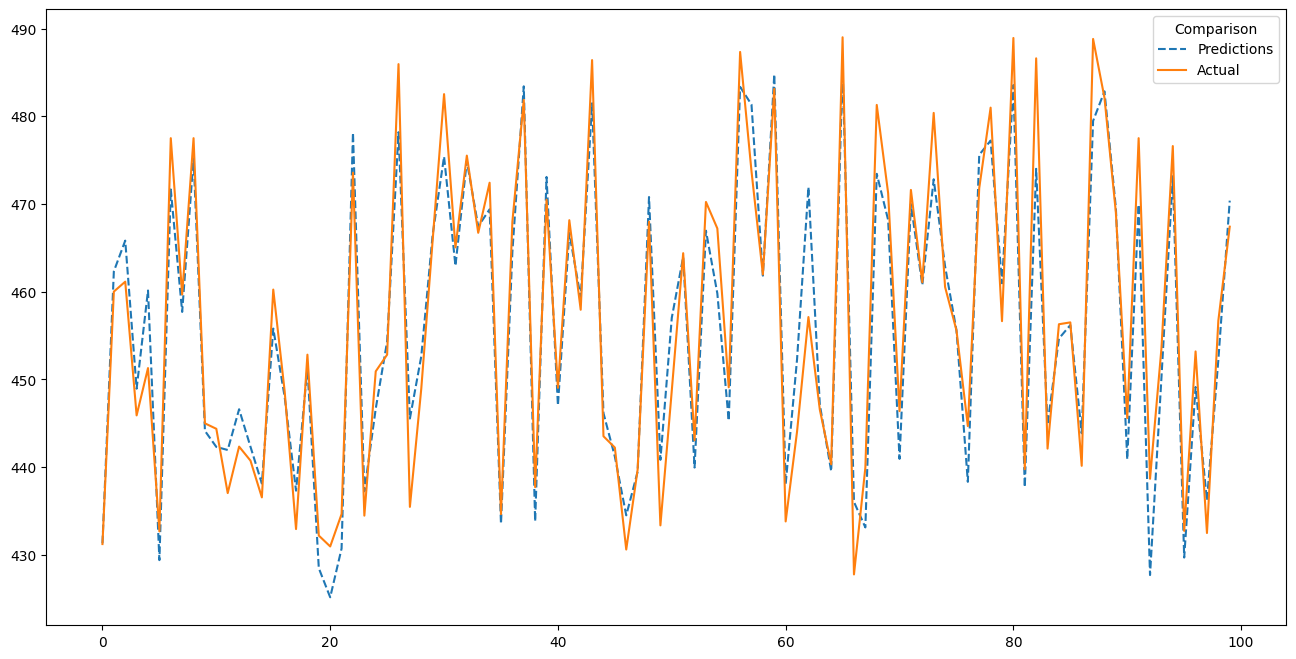

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(ab['Predictions'].head(100),linestyle='--',label='Predictions')
plt.plot(ab['Actual'].head(100),label='Actual')
plt.legend(loc='best',title='Comparison')
plt.show(block=True)